# Introduction to neral network classification with TensorFlow

In this notebook we're going to learn how to write neural network for classification problems.

A classification is where you try to classify somethong as one thing or another.

Afew types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

In [ ]:
# Import the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.__version__


'2.13.0'

##Creating data to view and fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check the feature
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand mow... let's visualize it!

In [ ]:

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


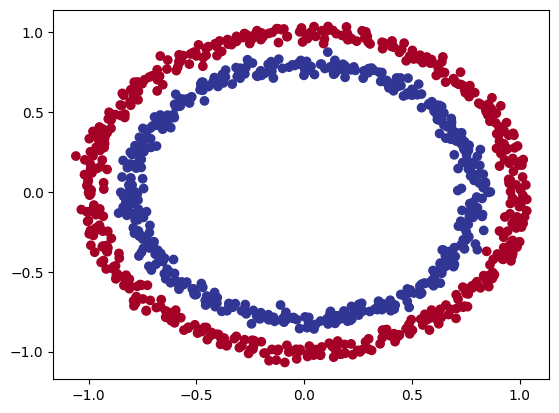

In [ ]:
# Visualize with the plot

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically.
 1. Create or import a model
 2. Compile the model
 3. Fit the model
 4. Evaluate the model
 5. Tweak..
 6. Evaluate...

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 3ms/step - loss: 4.8324 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3247 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.0630 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7755 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.4930


In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4990


[0.7035003900527954, 0.49900001287460327]

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 2.7095 - accuracy: 0.5000 - 1s/epoch - 36ms/step
Epoch 2/100
32/32 - 0s - loss: 0.9975 - accuracy: 0.5000 - 85ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 0.9210 - accuracy: 0.5000 - 81ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 0.8787 - accuracy: 0.5000 - 80ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.8450 - accuracy: 0.5000 - 82ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 0.8164 - accuracy: 0.5000 - 76ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.7926 - accuracy: 0.5000 - 84ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 0.7718 - accuracy: 0.5000 - 82ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: 0.7544 - accuracy: 0.5000 - 83ms/epoch - 3ms/step
Epoch 10/100
32/32 - 0s - loss: 0.7391 - accuracy: 0.5000 - 94ms/epoch - 3ms/step
Epoch 11/100
32/32 - 0s - loss: 0.7264 - accuracy: 0.5000 - 80ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.7164 - accuracy: 0.5000 - 78ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - 

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5170


[0.693191647529602, 0.5170000195503235]

In [ ]:
# Set random  seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5060


[0.6998248100280762, 0.5059999823570251]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To visualize our model's predictions, let's create a function `plot_decision_boundary()`, This function will:

* Take in a training model, features (X) and labels(y)
* Create a meshgrid of the diferent X values
* Make predictions across the meshgrid
* Plot the predictions as well a line between zones(Where each unique calss falls)

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plot the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create Xvalues (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
      print('doing binary classification')
      y_pred = np.round(y_pred.reshape(xx.shape))

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


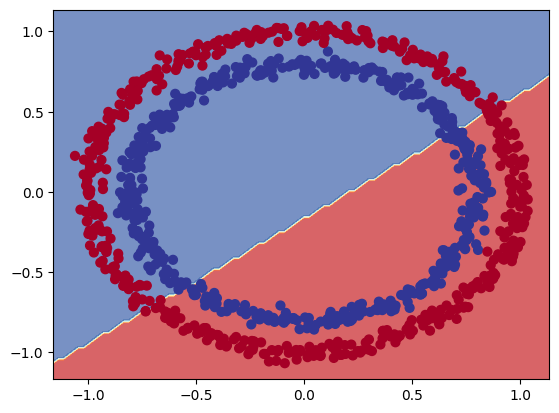

In [ ]:
 # Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# # Let's see if our model can be used for a regression problem...

tf.random.set_seed(41)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test data sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# # Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

ohh wait... we compile our model for a binary classification problem

But... we're now working on a regression problem, let's change the model to suit the model.

In [ ]:
# Set up random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 382.7263 - mae: 382.7263
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 107.1765 - mae: 107.1765
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 120.2818 - mae: 120.2818
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 77.9281 - mae: 77.9281
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 59.4746 - mae: 59.4746
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8066 - mae: 44.8066
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 44.7785 - mae: 44.7785
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 47.3279 - mae: 47.3279
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.0449 - mae: 43.0449
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 43.3146 - mae: 43.3146
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


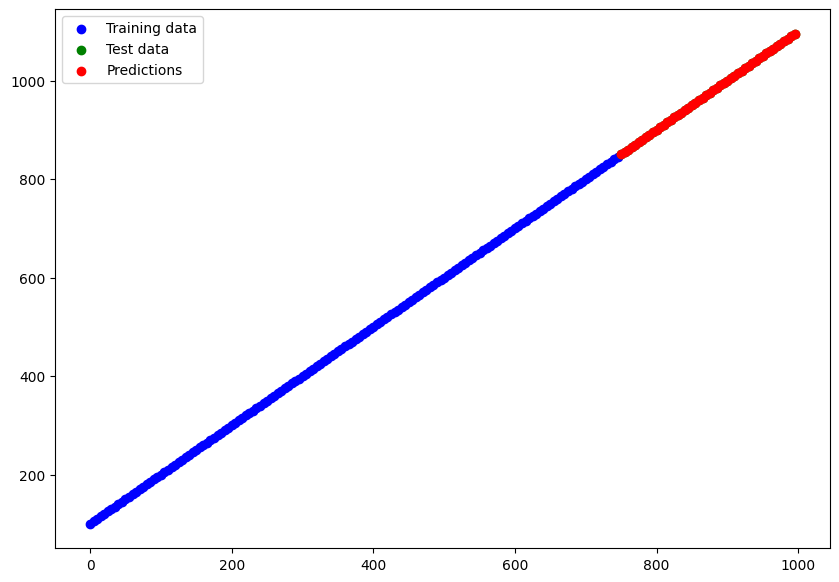

In [ ]:
# Make prediction with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_test, c='r', label='Predictions')
plt.legend();

The missing piece: Non-liniarity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.4035 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3566 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3313 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2661 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1330 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1260 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0845 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9610 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9172 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8364 - accuracy: 0.4710
Epoch 11/

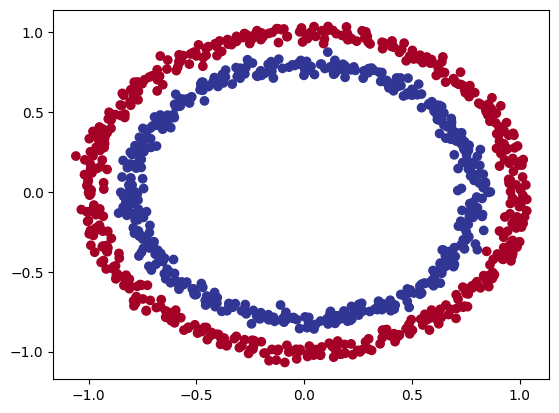

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


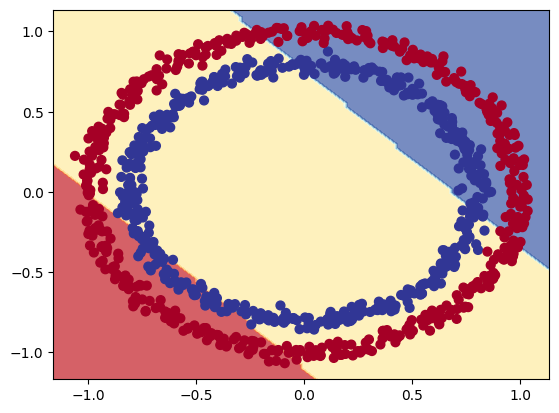

In [ ]:
# Checkt the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with mon-liniar activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr= 0.001),
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4292 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4136 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4044 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3970 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3845 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3535 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3526 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3514 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3500 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3486 - accuracy: 0.4770
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


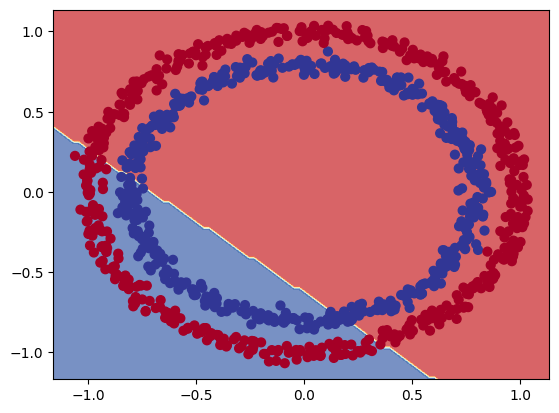

In [ ]:
# Check the decision boundary
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=300)

Epoch 1/300
32/32 [==============================] - 2s 3ms/step - loss: 5.0915 - accuracy: 0.5000
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 4.6558 - accuracy: 0.5000
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 4.3232 - accuracy: 0.5000
Epoch 4/300
32/32 [==============================] - 0s 3ms/step - loss: 4.1115 - accuracy: 0.5000
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 3.4350 - accuracy: 0.5000
Epoch 6/300
32/32 [==============================] - 0s 4ms/step - loss: 3.1380 - accuracy: 0.5000
Epoch 7/300
32/32 [==============================] - 0s 3ms/step - loss: 2.9622 - accuracy: 0.5000
Epoch 8/300
32/32 [==============================] - 0s 4ms/step - loss: 2.7924 - accuracy: 0.5000
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 2.4215 - accuracy: 0.5000
Epoch 10/300
32/32 [==============================] - 0s 3ms/step - loss: 1.7903 - accuracy: 0.4890
Epoch 11/

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9920


[0.04822896420955658, 0.9919999837875366]

313/313 [==============================] - 1s 1ms/step
doing binary classification


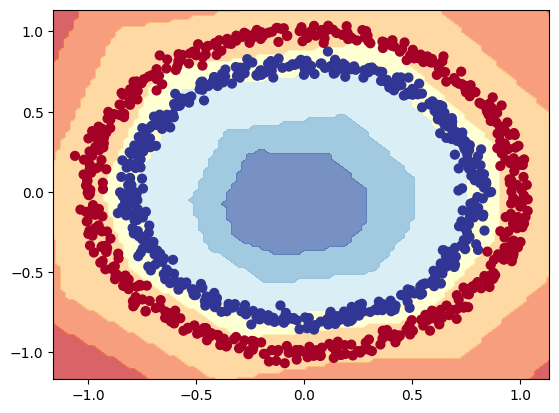

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6904 - accuracy: 0.5180
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.5440
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.7400
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3583 - accuracy: 0.9360
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9940
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9970
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9970
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9980
Epoch 11/

In [ ]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.1885e-04 - accuracy: 1.0000


[0.00041884949314408004, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification


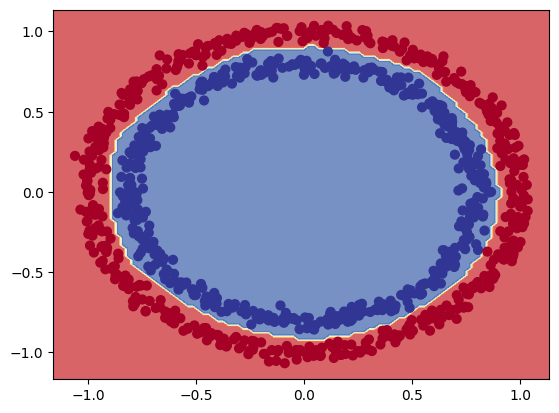

In [ ]:
# Let's visualize
plot_decision_boundary(model=model_8,
                       X=X,
                       y=y)

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

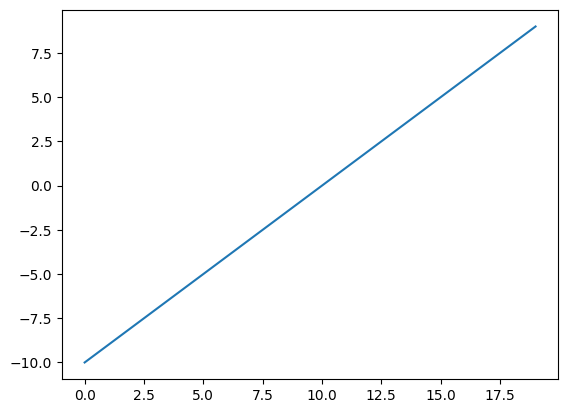

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replecating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1/ (1+ tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

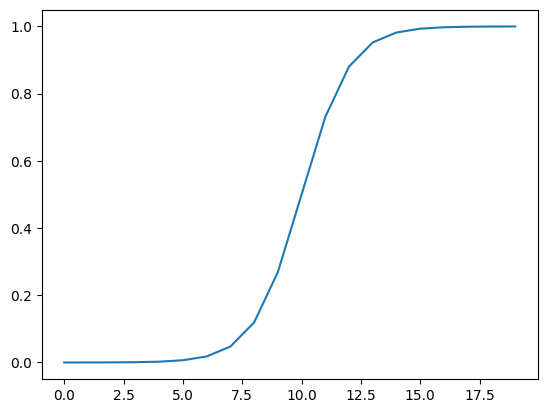

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's replicate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

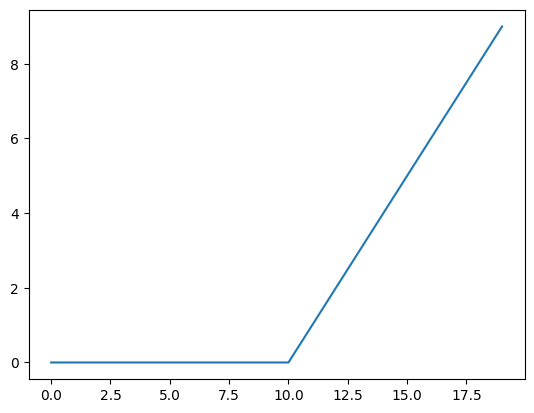

In [ ]:
# Plot relu modified tensor
plt.plot(relu(A))

In [ ]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

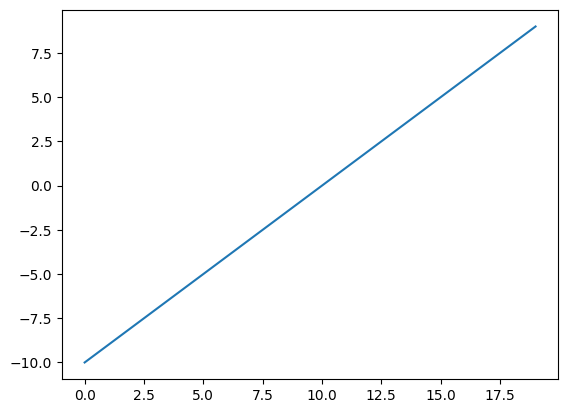

In [ ]:
#Plot the linear function
plt.plot(tf.keras.activations.linear(A))

## Evaluating and emproving our calssification

So far we've been training and testing on the same dataset...
However, in machine learnig this is basically a sin.
So let's create a training and test set

In [ ]:
# Check hoe many examples we
len(X)

1000

In [ ]:
# Split into train and test split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate the model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_9.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.5025
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5387
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.6675
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.9187
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9962
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9987
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9975
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 1.0000
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9975
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 11/15
25/25 [

In [ ]:
# Evaluate the model on the test data set
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000


[0.010546248406171799, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


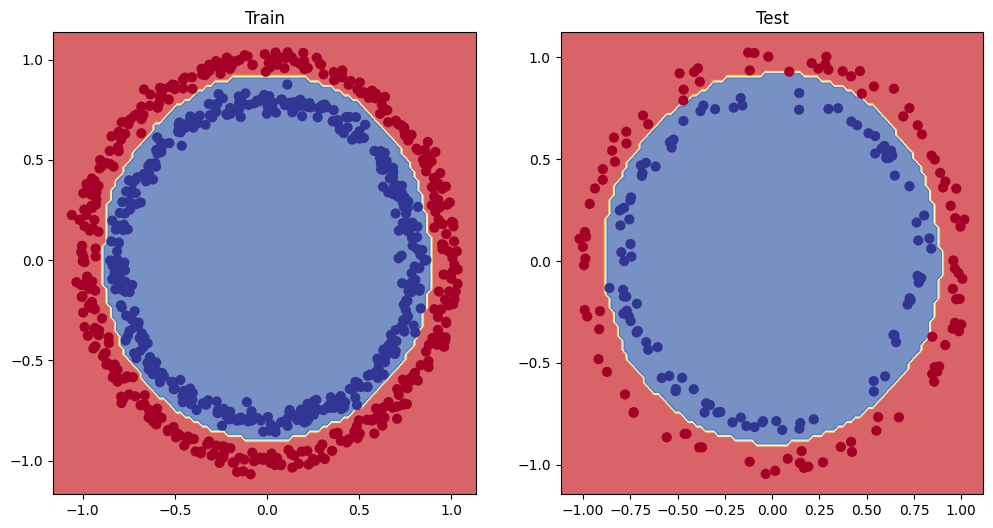

In [ ]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_9, X=X_train, y= y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_9, X= X_test, y=y_test)
plt.show()


##  Plot the loss (or training) curves

In [ ]:
# Convert the hstory object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.690894,0.50250
1,0.673796,0.53875
2,0.624954,0.66750
3,0.464124,0.91875
4,0.210926,0.99625
5,0.084721,0.99875
6,0.039323,0.99750
7,0.026447,1.00000
8,0.023520,0.99750
9,0.014146,1.00000


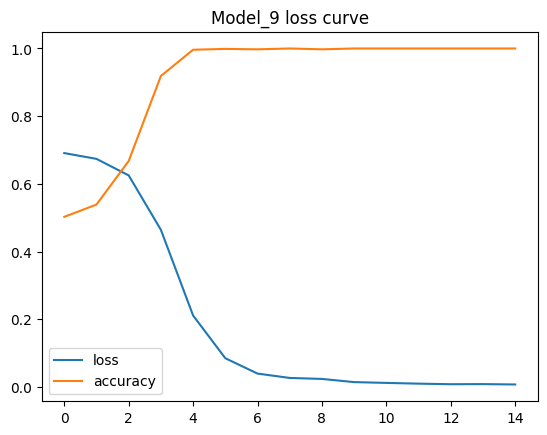

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curve");

## Finding the best learning rate

To find the ideal larning rate ( the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can ass to your *while* its training.
* Another model(we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer="Adam",
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6905 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5362 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.5788 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.6250 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

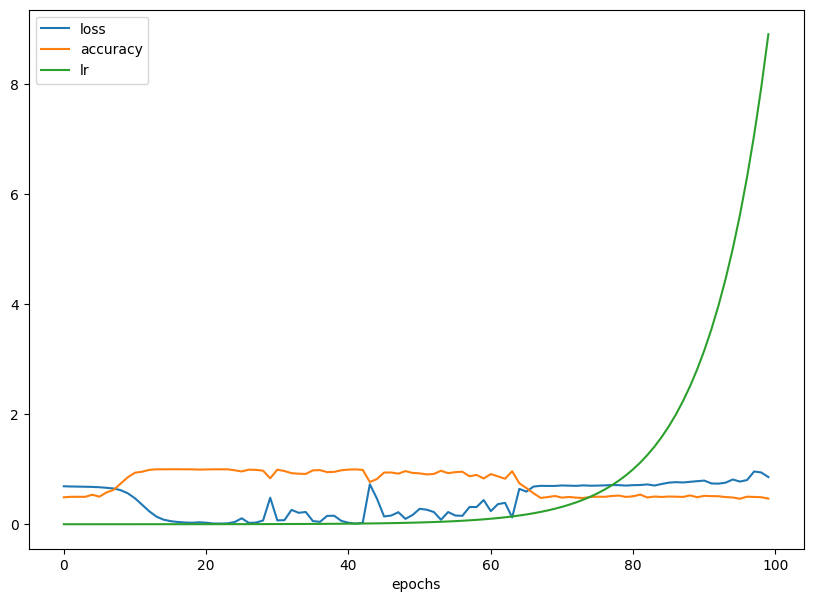

In [ ]:
# Check out the history
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel='epochs');

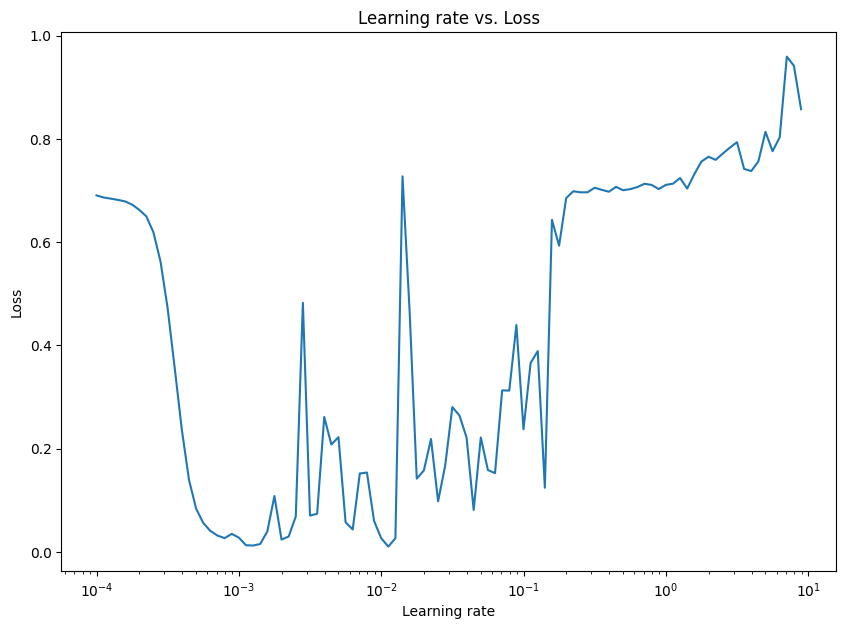

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')
plt.show()

In [ ]:
len(lrs)

100

In [ ]:
# let's try using a higher *ideal* learning rate  with the same model

# Set the random seed
tf.random.set_seed(42)

#Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

# Compile the model with the ideal learning rate
model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])

#Fit the model for 20 epochs
history_11 = model_11.fit(X_train,
                          y_train,
                          epochs=10)


Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.4938
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.5412
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6950
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.9287
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9975
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9962
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9987
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000


In [ ]:
# Evaluate model 11 on the test dataset
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 1.0000


[0.011708992533385754, 1.0]

In [ ]:
# Evaluate the model8 on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 1.0000


[0.010546248406171799, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

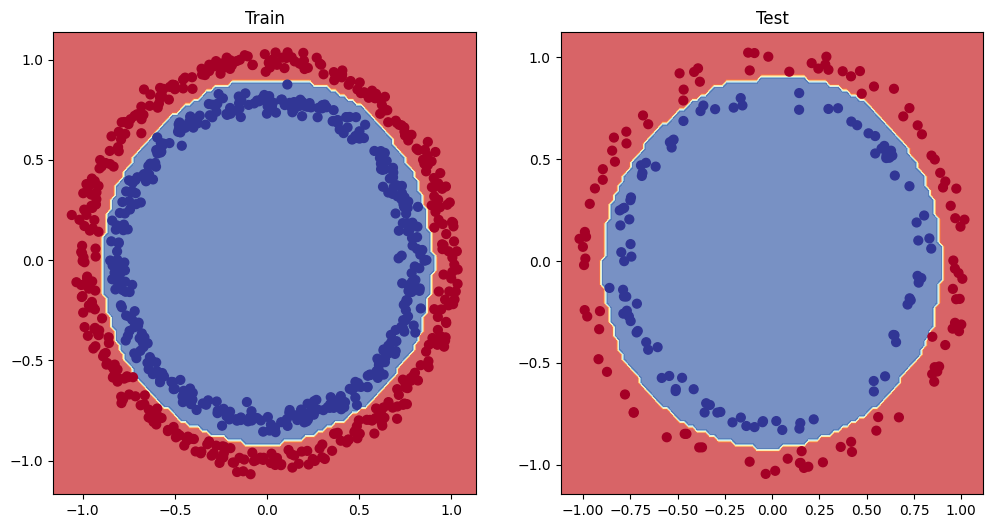

In [ ]:
# Plot the desision boundaries for the training and test set
plt.figure(figsize =(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show

from pandas.core.ops import methods
## More classification evaluation methods
Alongside visualization our models result as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiear with:
* Accuracy
* Precision
* Recall
* f1-score
* Confusion metrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 1.0000
Model loss on the test set: 0.011708992533385754
Model accuracy on the test set: 100.00%


How about a confusion metrics

In [ ]:
# create a confusion metrics
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create confusion Matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.9757868e-01],
       [9.9963105e-01],
       [9.9898952e-01],
       [9.9890351e-01],
       [1.5537219e-01],
       [1.2474160e-03],
       [9.6853340e-01],
       [7.0181250e-04],
       [9.9890792e-01],
       [3.7248232e-03]], dtype=float32)

oops... looks like our prediction array has come out in  **prediction probability** form... the standard output from the sigmoid(or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

How about we prettify our confusion matrix?

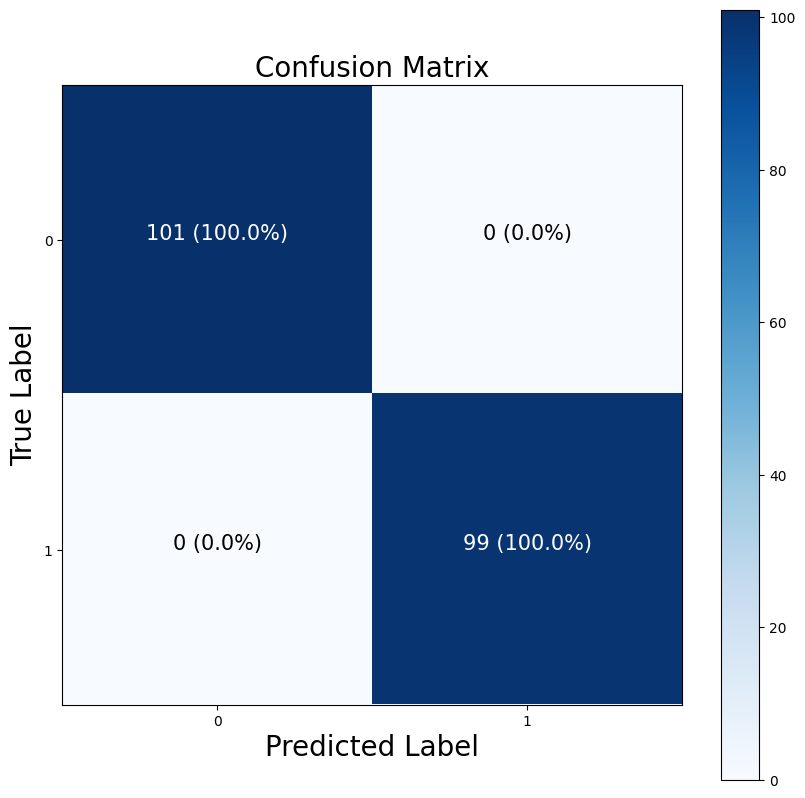

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion_matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Lable the axis
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size = 15)

## Working with a larger example (multiclass classification)

When you have more then two classes as an option, it's **multi-class classification**.
* This means if you have 3 different classes, it's multiclass classification.
* It also means if you have 1000 different classses, it's multiclass classification.

To practice multi-class classification, we're going to built a neural network to classify images of different items of clothing.



In [ ]:
#

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

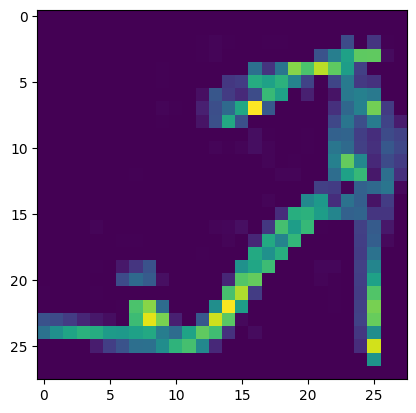

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[8]);

In [ ]:
# Check out samples label
train_labels[8]

5

In [ ]:
# Create a small list so we can index into our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

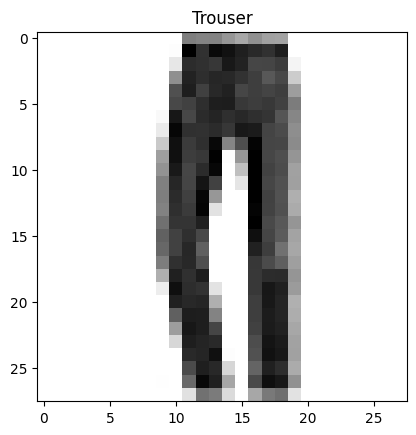

In [ ]:
# Plot an image image and its label
index_of_choice = 1004
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

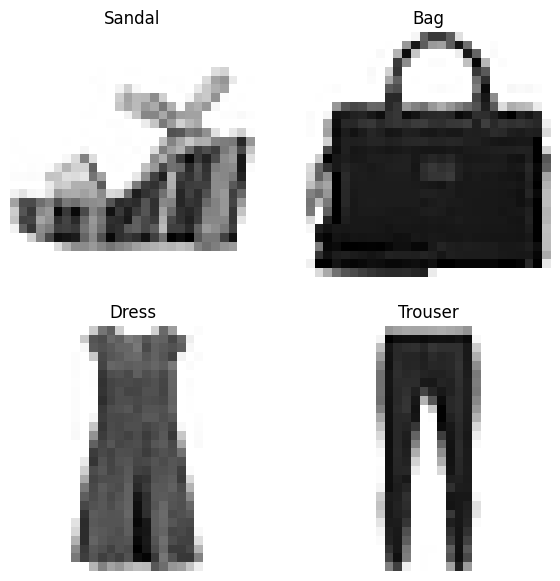

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Built a multi-class calssification model

For our multi-calss classification model, we can use a similar architecture to our binary calssifier, however, we're going to have to tweak a few things:
* `Input shape` = 28 x 28 (the shape of one image)
* `Output shape` = 10 (one per class of clothing)
* `Loss function` = tf.keras.losses.CategoricalCrossentropy()
* If your labels are one_hot encoded, use `CategoricalCrossentropy()`
* If your labels are integer form use `SparseCategoricalCroddentropy()`
* `Output layer activation` = Softmax(not sigmoid)

In [ ]:
# Our data needs to be flatten (from 28 * 28 to 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28 * 28

784

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# First multi-class-calssification model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_12.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                                epochs = 10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3072 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the model summary
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor between 0 & 1


In [ ]:
# We can get our training and testing data between 0 &* 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
# Check the min & amx values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
# Now our data is noemalized, let's built a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_12)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
norm_history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs = 20,
                            validation_data =(test_data_norm, test_labels)
                            )

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2041 - accuracy: 0.5441 - val_loss: 0.8088 - val_accuracy: 0.7088
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7282 - accuracy: 0.7383 - val_loss: 0.7104 - val_accuracy: 0.7443
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6571 - accuracy: 0.7572 - val_loss: 0.6585 - val_accuracy: 0.7560
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6136 - accuracy: 0.7762 - val_loss: 0.6280 - val_accuracy: 0.7767
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5784 - accuracy: 0.7955 - val_loss: 0.5952 - val_accuracy: 0.7939
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5577 - accuracy: 0.8023 - val_loss: 0.5911 - val_accuracy: 0.7896
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5461 - accuracy: 0.8083 - val_loss: 0.6044 - val_accuracy:

`Note`: Neural networks tend to prefer data in numerical form as well as scaled/normalized(numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

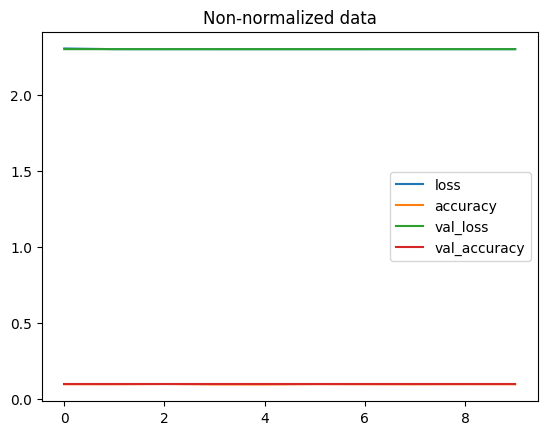

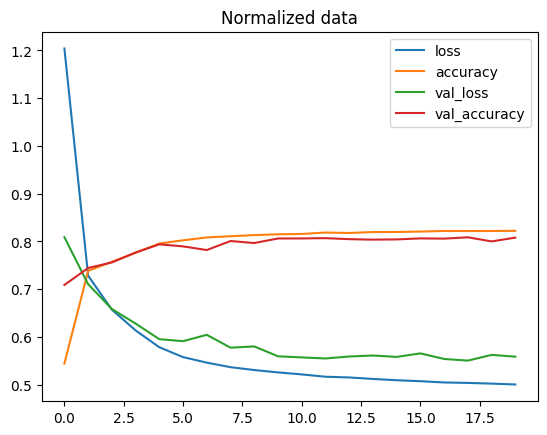

In [ ]:
# Plot the non-normalize data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot the normalize data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

`Note`: The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# Fit the model
find_lr_history = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0916 - accuracy: 0.5782 - val_loss: 0.7165 - val_accuracy: 0.7291 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6581 - accuracy: 0.7515 - val_loss: 0.6540 - val_accuracy: 0.7499 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6042 - accuracy: 0.7758 - val_loss: 0.6121 - val_accuracy: 0.7802 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5559 - accuracy: 0.8058 - val_loss: 0.5580 - val_accuracy: 0.8112 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5307 - accuracy: 0.8166 - val_loss: 0.5410 - val_accuracy: 0.8133 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5172 - accuracy: 0.8201 - val_loss: 0.5537 - val_accuracy: 0.8061 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal rate')

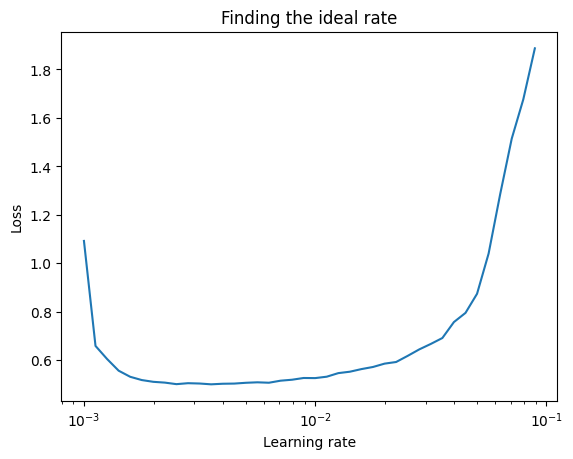

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal rate')

In [ ]:
# Let's refot the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"]
                 )

# Fit the model
history_15 = model_15.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.4504 - accuracy: 0.3940 - val_loss: 1.0207 - val_accuracy: 0.5920
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8327 - accuracy: 0.6810 - val_loss: 0.7452 - val_accuracy: 0.7246
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6989 - accuracy: 0.7388 - val_loss: 0.7247 - val_accuracy: 0.7291
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6599 - accuracy: 0.7548 - val_loss: 0.6766 - val_accuracy: 0.7530
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6411 - accuracy: 0.7618 - val_loss: 0.6695 - val_accuracy: 0.7598
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6290 - accuracy: 0.7665 - val_loss: 0.6877 - val_accuracy: 0.7475
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6220 - accuracy: 0.7693 - val_loss: 0.6679 - val_accuracy:

## Evaluate our multi-class classification model

To evaluate our multi-class calssification model we could:
* Evaluate its performance using other classification metrics(such as a cnfusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results ( by training it for longer or changing the architecture)

In [ ]:
# create a confusion metrics

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion_matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set lables to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Lable the axis
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size = text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_15.predict(test_data_norm) # probs is short for "prediction probability"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.6485609e-07, 7.8076521e-12, 3.0499096e-11, 6.7949162e-07,
        9.8453546e-12, 1.3061160e-01, 5.1362449e-06, 1.2816724e-01,
        4.9260225e-02, 6.9195443e-01],
       [3.6546715e-02, 1.7531188e-10, 7.5639325e-01, 1.4149099e-04,
        1.0702641e-02, 2.1814853e-16, 1.9588248e-01, 1.8277842e-21,
        3.3333810e-04, 6.3994900e-19],
       [4.3366267e-06, 9.9076897e-01, 7.2720324e-10, 9.1935759e-03,
        8.8377743e-07, 4.2009961e-07, 7.1716251e-08, 3.1706219e-05,
        4.1683690e-10, 1.7244788e-12],
       [2.5038871e-06, 9.9256694e-01, 2.3912267e-10, 7.4029593e-03,
        3.6805159e-07, 2.3997012e-07, 3.0166458e-08, 2.6883430e-05,
        1.6533779e-10, 7.3217848e-13],
       [1.5090431e-01, 2.0499888e-06, 3.1103119e-01, 1.2095471e-02,
        5.4421481e-02, 1.3917015e-10, 4.6721879e-01, 1.4476547e-13,
        4.3266714e-03, 3.8304069e-13]], dtype=float32)

**Note** Remember to make predictions on the ame kind of data your model trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.6485609e-07, 7.8076521e-12, 3.0499096e-11, 6.7949162e-07,
        9.8453546e-12, 1.3061160e-01, 5.1362449e-06, 1.2816724e-01,
        4.9260225e-02, 6.9195443e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_preds.shape

(10000,)

In [ ]:
model_15.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.6215 - accuracy: 0.7863


[0.621469259262085, 0.786300003528595]

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds
                 )

array([[678,   2,  19,  99,  19,   3, 163,   0,  17,   0],
       [  0, 943,   2,  32,  18,   1,   2,   0,   2,   0],
       [ 18,   0, 657,   8, 232,   1,  81,   0,   3,   0],
       [ 40,  17,   9, 812,  52,   5,  58,   0,   7,   0],
       [  0,   2, 160,  20, 762,   0,  52,   0,   4,   0],
       [  0,   0,   0,   1,   0, 855,   2,  73,  24,  45],
       [120,   1, 200,  47, 162,   1, 449,   0,  20,   0],
       [  0,   0,   0,   0,   0,  53,   0, 900,   1,  46],
       [  2,   0,   8,   8,   7,  18,  52,   7, 893,   5],
       [  0,   0,   0,   0,   0,  26,   0,  48,  12, 914]])

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**Note:** Often when working with images and other forms of visualize data, ti's a good idea to visualize as much as possible to develop a future understanding of the data and the inputs and outputs of your model.

How about we create a fun little function for:

* Plot a random image.
* Make a prediction on said image.
* Label the plot with the truth label & the predicted label.

In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plot it and labels it with a predicted and truth labels
  '''
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and tergets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the titels depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                    true_label),
               color = color) # Set the color to green or red bases on if prediction is true or wrong


1/1 [==============================] - 0s 27ms/step


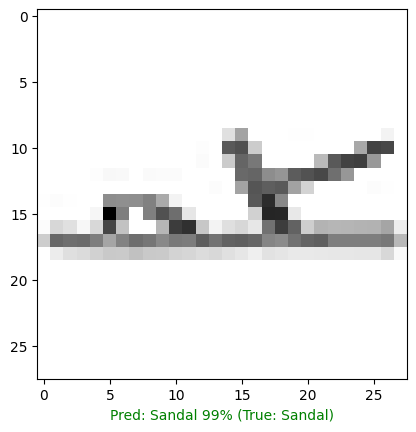

In [ ]:
# Check out a random image
plot_random_image(model = model_15,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_15.layers

In [ ]:
# Extract a particular layer
model_15.layers[1]

In [ ]:
# Get th patterns of a layer in our network
weights, biases = model_15.layers[1].get_weights()



In [ ]:
# Shape
weights, weights.shape

(array([[ 0.03531097,  0.14771208, -0.2751781 ,  0.6363451 ],
        [ 0.05777416, -0.37886968,  0.49729002,  0.6920487 ],
        [-0.00803226, -1.2274761 ,  1.0097013 ,  0.34447744],
        ...,
        [-0.05793334, -0.3932814 , -0.47689393,  0.5754441 ],
        [-0.05019394,  0.03064438, -1.0571886 ,  0.1551875 ],
        [ 0.02607542, -0.2520994 ,  0.44911358, -0.3254786 ]],
       dtype=float32),
 (784, 4))

In [ ]:
model_15.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [166]:
# Bias and biases vector
biases, biases.shape

(array([-0.03626526,  2.219532  ,  1.5270216 ,  2.8504777 ], dtype=float32),
 (4,))

Every nuron has bias vector. Each of these paired with a weights matrix.

The bias vector also get initialized as zeros (at least int the case of tensorFlow Dense layers)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

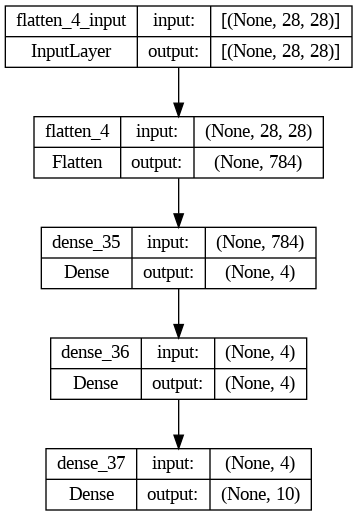

In [168]:
# Let's check out another way to viewing aor deep learning models
from tensorflow.keras.utils import plot_model
# See the inputa and outputs of each layers
plot_model(model_15, show_shapes=True)